# Nomes

* Alícia Marzola Chaves
* Arthur Pereira Carvalho

# Base e Bibliotecas

In [49]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [50]:
pd.set_option('display.max_colwidth', None, 'display.max_rows', None, 'display.max_columns', None)
np.set_printoptions(threshold=np.inf)

In [51]:
df = pd.read_csv('train.csv')
df.head(5)

,keyword,likes,tweets
0,COVID-19,1,The headline kinda makes it sound like the AP acknowledges that the “emergency measures” taken during the COVID-19 crisis killed more than 1 million Americans.
1,COVID-19,0,"ATLANTIC CITY — The city's Police Athletic League has received $65,000 from the state to restart a youth boxing program shuttered during the COVID-19 pandemic."
2,COVID-19,0,I feel like Diana's line she draws is if his school experience was interpreted by Covid-19 or not
3,COVID-19,1,"COVID-19 was the single most fatal communicable disease in living memory. It could literally kill you for going to the grocery store. But sure, call it a ""civili liberties"" attack if that makes you sleep better at night."
4,COVID-19,0,Studies: Dogs can detect COVID-19 with greater than 80% sensitivity | CIDRAP


# Data Understanding & Visualization

In [52]:
print(f"O Dataset contém {df.shape[1]} colunas e {df.shape[0]} samples.")

O Dataset contém 3 colunas e 128837 samples.


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128837 entries, 0 to 128836
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   keyword  128837 non-null  object
 1   likes    128837 non-null  int64 
 2   tweets   128837 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.9+ MB


In [54]:
# Valores Faltantes
df.isna().sum()

keyword    0
likes      0
tweets     0
dtype: int64

Análise de Quantidade de Caracteres por Tweet

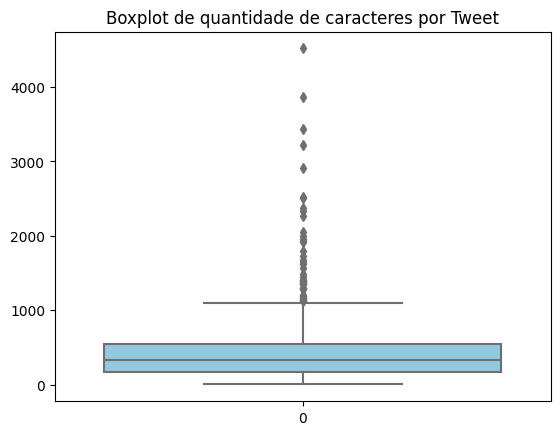

In [55]:
# Cria coluna de tamanho da string
df['len'] = df['tweets'].str.len()

# Agrupa por tamanho
tamanho = df.groupby('len').size()
sns.boxplot(tamanho.index, color='skyblue')
plt.title("Boxplot de quantidade de caracteres por Tweet")
plt.show()

In [56]:
df_max = df.loc[df['tweets'].str.len()>280]
print(f"{len(df_max)} tweets ultrapassam o limite de 280 carcateres.")

1504 tweets ultrapassam o limite de 280 carcateres.


Remoção de outliers

In [57]:
tweets_longos = df_max['tweets'].to_list()
df_filtrada = df.loc[~df['tweets'].isin(tweets_longos)]
df_filtrada['len'].max()

280

Análise de Caracteres e Palavras por Tweet

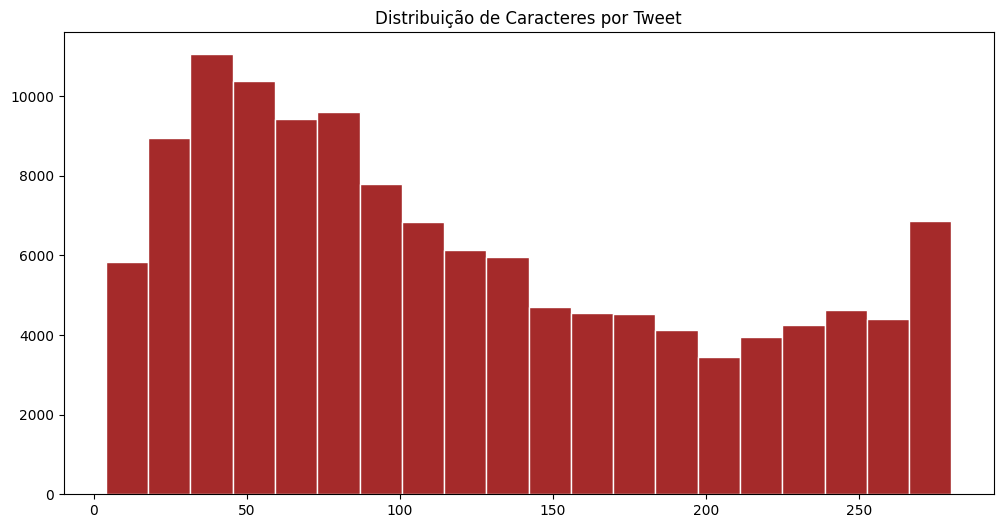

In [58]:
plt.figure(figsize=(12,6))
plt.hist(df_filtrada['len'], color='brown', bins=20, edgecolor='white')
plt.title("Distribuição de Caracteres por Tweet")
plt.show()

/tmp/ipykernel_828/3241805324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrada.loc[:, 'words'] = df_filtrada['tweets'].apply(lambda x: len(x.split()))


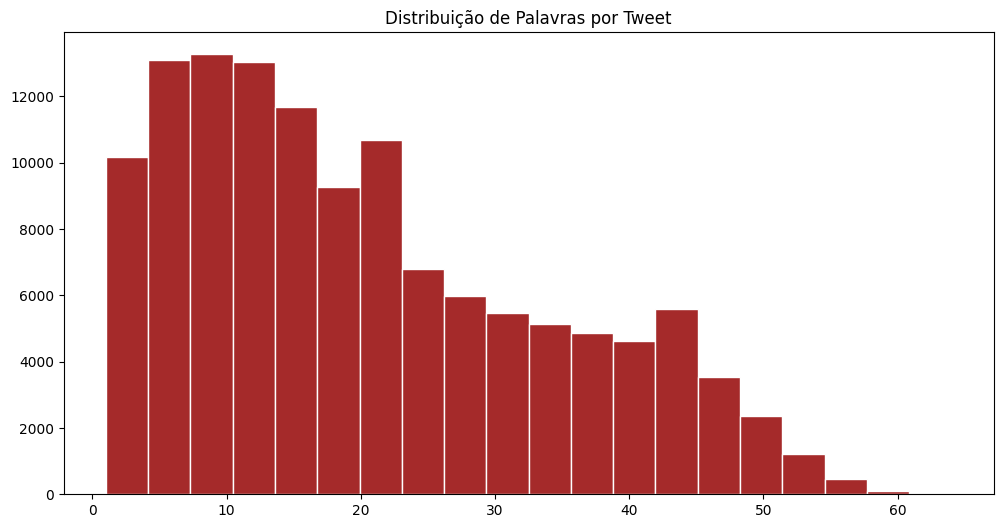

In [59]:
df_filtrada.loc[:, 'words'] = df_filtrada['tweets'].apply(lambda x: len(x.split()))
plt.figure(figsize=(12,6))
plt.hist(df_filtrada['words'], bins=20, edgecolor='white', color='brown')
plt.title('Distribuição de Palavras por Tweet')
plt.show()

Frequência de Palavras

In [60]:
from collections import Counter

all_words = ' '.join(df_filtrada['tweets']).split()

#Filtrar para palavras com mais de 4 caracteres
filt_words = [word for word in all_words if len(word)>4]

word_freq = Counter(filt_words)

common_words = pd.DataFrame(word_freq.most_common(20), columns=['Word', 'Frequency'])
print(common_words)

         Word  Frequency
0       about       7147
1       &amp;       5170
2       Queen       4603
3       their       4544
4      people       4417
5     Jeffrey       4339
6      iPhone       4307
7       would       4104
8       World       3909
9   Elizabeth       3815
10     Johnny       3672
11      think       3281
12    Ukraine       3132
13     Dahmer       3128
14      Super       3085
15    because       2898
16   Facebook       2897
17      Smith       2852
18      world       2851
19      still       2621


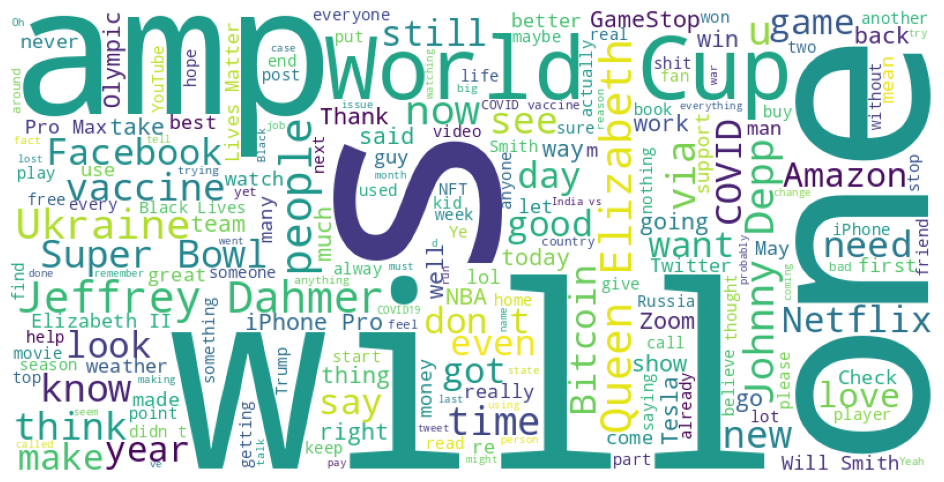

In [61]:
from wordcloud import WordCloud

text = ' '.join(df['tweets'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Análise de Palavras Chave

In [62]:
keywords = df.groupby('keyword').size().sort_values(ascending=True)
print(f"Palavras-chave menos encontradas no dataset:\n{keywords.head(5)}")

Palavras-chave menos encontradas no dataset:
keyword
xvideo         109
Instagram      124
porn           213
Remote work    678
TikTok         687
dtype: int64


In [63]:
keywords = df.groupby('keyword').size().sort_values(ascending=True)
print(f"Palavras-chave menos encontradas no dataset:\n{keywords.head(5)}")

Palavras-chave menos encontradas no dataset:
keyword
xvideo         109
Instagram      124
porn           213
Remote work    678
TikTok         687
dtype: int64


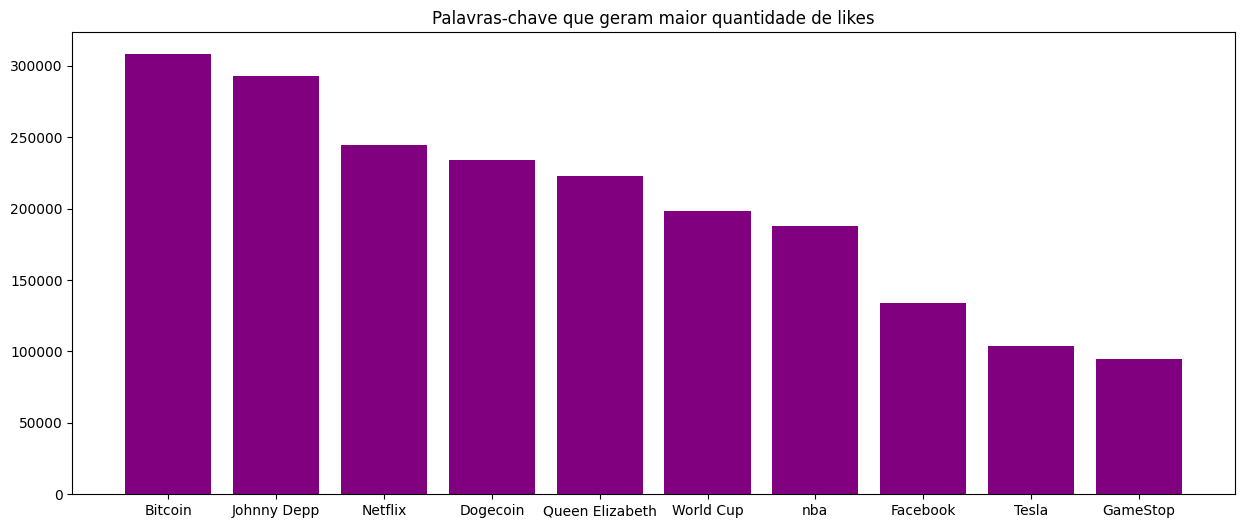

In [64]:
keywords = df_filtrada.groupby('keyword').size()
categories = keywords.index.to_list()

df_categories = df_filtrada.loc[df_filtrada['keyword'].isin(categories)]
likes_per_category = df_categories.groupby('keyword')['likes'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(15,6))
plt.bar(likes_per_category.index, likes_per_category.values, color='purple')
plt.title('Palavras-chave que geram maior quantidade de likes')
plt.show()

Análise de Curtidas

In [65]:
# Medidas Estatísticas

df_filtrada['likes'].describe()

count    127333.000000
mean         23.383412
std         585.593796
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max       82843.000000
Name: likes, dtype: float64

In [66]:
likes = df_filtrada.groupby('likes').size()
likes.head(15)

likes
0     65018
1     24139
2     10379
3      5631
4      3519
5      2461
6      1779
7      1324
8      1065
9       903
10      705
11      631
12      555
13      429
14      439
dtype: int64

/home/alicia/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


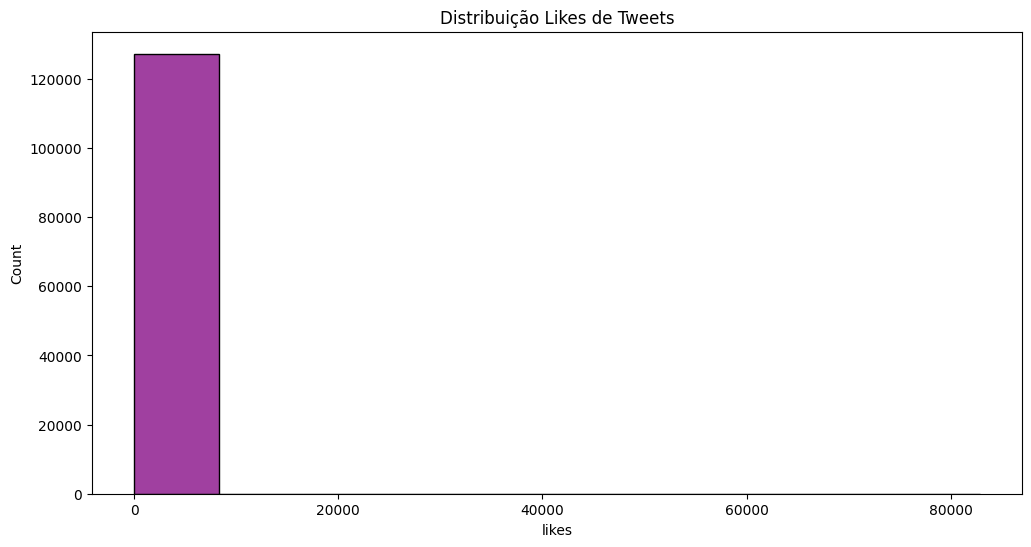

In [67]:
# Distribuição de Likes
plt.figure(figsize=(12,6))
sns.histplot(df_filtrada['likes'], color='purple', bins=10)
plt.title("Distribuição Likes de Tweets")
plt.show()

Divisão de tweets em populares (+1000 curtidas) e não populares para facilitar visualização

/home/alicia/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


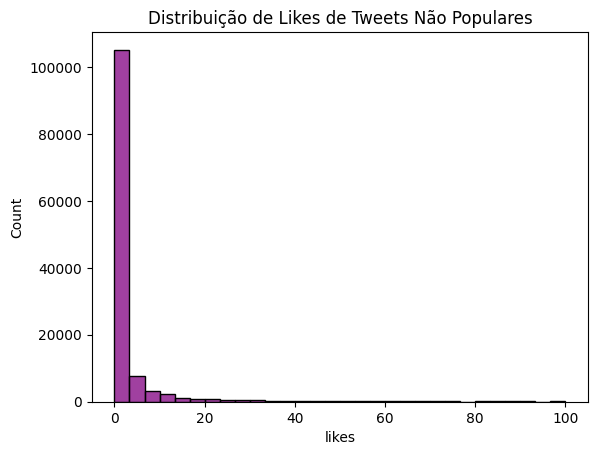

In [68]:
likes100 = df_filtrada.loc[df_filtrada['likes']<=100]
sns.histplot(likes100['likes'], color='purple', bins=30)
plt.title("Distribuição de Likes de Tweets Não Populares")
plt.show()

Há 335 tweets com mais de 1000 likes.


/home/alicia/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


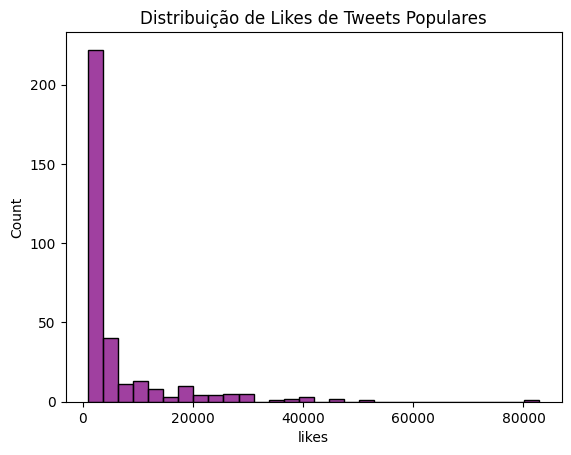

In [69]:
likes1000 = df_filtrada.loc[df_filtrada['likes']>=1000]
print(f"Há {len(likes1000)} tweets com mais de 1000 likes.")
sns.histplot(likes1000['likes'], color='purple', bins=30)
plt.title("Distribuição de Likes de Tweets Populares")
plt.show()

Análise de Caracteres Especiais

In [70]:
df_emojis = df_filtrada[df_filtrada['tweets'].str.contains(r'[\u263a-\U0001f645]')]
df_hashtags = df_filtrada[df_filtrada['tweets'].str.contains('#')]
df_questions = df_filtrada[df_filtrada['tweets'].str.contains(r'\?', na=False)]
df_exclamation = df_filtrada[df_filtrada['tweets'].str.contains('!')]

In [71]:
print(f"{len(df_emojis)} tweets possuem emojis, {len(df_hashtags)} tweets possuem hashtags, {len(df_questions)} tweets apresentam ponto(s) de interrogação e {len(df_exclamation)} tweets ponto(s) de exclamação.")

21308 tweets possuem emojis, 23457 tweets possuem hashtags, 16041 tweets apresentam ponto(s) de interrogação e 17123 tweets ponto(s) de exclamação.


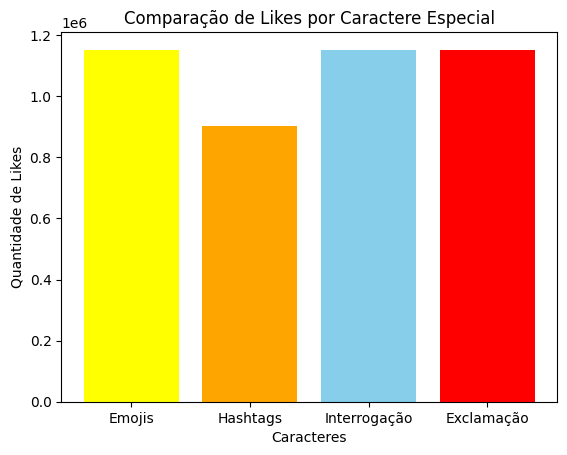

In [72]:
likes_emojis = df_emojis['likes'].sum()
likes_hashtags = df_hashtags['likes'].sum()
likes_questions = df_emojis['likes'].sum()
likes_exclamation = df_emojis['likes'].sum()

categories = ['Emojis', 'Hashtags', 'Interrogação', 'Exclamação']
likes = [likes_emojis, likes_hashtags, likes_questions, likes_exclamation]

plt.bar(categories, likes, color=['yellow', 'orange', 'skyblue', 'red'])
plt.xlabel('Caracteres')
plt.ylabel('Quantidade de Likes')
plt.title('Comparação de Likes por Caractere Especial')
plt.show()


Análise de Sentimento

-1 (Negativo) a 1 (Positivo)

In [73]:
from textblob import TextBlob

df_filtrada.loc[:, 'sentiment'] = df_filtrada['tweets'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_filtrada[['tweets', 'sentiment']].head(10)

/tmp/ipykernel_828/3139454162.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrada.loc[:, 'sentiment'] = df_filtrada['tweets'].apply(lambda x: TextBlob(x).sentiment.polarity)


,tweets,sentiment
0,The headline kinda makes it sound like the AP acknowledges that the “emergency measures” taken during the COVID-19 crisis killed more than 1 million Americans.,0.233333
1,"ATLANTIC CITY — The city's Police Athletic League has received $65,000 from the state to restart a youth boxing program shuttered during the COVID-19 pandemic.",0.000000
2,I feel like Diana's line she draws is if his school experience was interpreted by Covid-19 or not,0.000000
3,"COVID-19 was the single most fatal communicable disease in living memory. It could literally kill you for going to the grocery store. But sure, call it a ""civili liberties"" attack if that makes you sleep better at night.",0.357143
4,Studies: Dogs can detect COVID-19 with greater than 80% sensitivity | CIDRAP,0.500000
5,"Now you're putting a lot of different things on one pile. Sure there is disagreement about lockdowns, and maybe even about masks, but hardly about vaccines. Either way, this was about Peter McCullough's promoting hydroxychloroquine as a COVID-19 treatment.",0.069444
6,"Wow,how can you forget the KEMSA scandals which have not been resolved even after the US had Kenya a big lead-up clue and arrested about four Kenyans involved in the COVID-19 scam?This latest one is still fresh.",0.266667
7,"The hardest thing to change are people's minds. The 2023 Writers Guild of America strike is the largest interruption to American television and film production since the COVID-19 pandemic in 2020, as well as the largest labor stoppage for the WGA since the 2007–08 strike.",0.000000
8,unroll #COVID19,0.000000
9,"Hidden in plain sight, the truth about Covid-19 and lockdown.Check out jonah_uk7hotmailcom's video! #TikTok",-0.217262


# Data Pre-Processing

Preparar coluna 'tweets'

In [74]:
# Todas letras minúsculas

df_principal = df_filtrada[['tweets', 'likes']]

df_principal.loc[:, 'tweets'] = df_principal['tweets'].apply(lambda x: x.lower())

In [75]:
# Remover caracteres especiais

import re

def remove_special_characters(x):
    return re.sub(r'[^A-Za-z0-9\s]', '', x)

df_principal.loc[:, 'tweets'] = df_principal['tweets'].apply(remove_special_characters)

In [76]:
# Remover URLs

def remove_urls(x):
    return re.sub(r'http[s]?://\S+|www\.\S+', '', x)

df_principal.loc[:, 'tweets'] = df_principal['tweets'].apply(remove_urls)

Normalizar Likes

In [77]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_principal.loc[:, 'likes'] = scaler.fit_transform(df_principal[['likes']])

/tmp/ipykernel_828/1099624765.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.20710259e-05 0.00000000e+00 0.00000000e+00 1.20710259e-05
 0.00000000e+00 1.20710259e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.20710259e-04
 7.24261555e-05 0.00000000e+00 2.41420518e-05 1.20710259e-05
 1.93136415e-04 0.00000000e+00 0.00000000e+00 1.20710259e-05
 4.82841037e-05 1.20710259e-05 0.00000000e+00 0.00000000e+00
 1.08639233e-04 1.97964825e-02 3.62130777e-05 0.00000000e+00
 1.44852311e-04 1.20710259e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.20710259e-05 1.20710259e-05 0.00000000e+00
 1.20710259e-05 2.29349492e-04 0.00000000e+00 0.00000000e+00
 2.41420518e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.20710259e-05 0.00000000e+00 0.00000000e+00 4.82841037e-05
 0.00000000e+00 0.00000000e+00 7.24261555e-05 0.00000

Tokenização com Tokenizer do BERT

In [78]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

def tokenize_texts(text, tokenizer):
    return tokenizer(
        text.tolist(),
        max_length=128,
        truncation=True,
        padding='max_length',
        return_tensors='pt'
    )

In [80]:
tokenized = tokenize_texts(df_principal['tweets'], tokenizer)
print(tokenized['input_ids'].shape)
print(tokenized['attention_mask'].shape)

torch.Size([127333, 128])
torch.Size([127333, 128])


In [ ]:
df_principal.loc[:, 'input_ids'] = list(tokenized['input_ids'].numpy())
df_principal.loc[:, 'attention_mask'] = list(tokenized['attention_mask'].numpy())

In [82]:
df_principal.head()

,tweets,likes,input_ids,attention_mask
0,the headline kinda makes it sound like the ap acknowledges that the emergency measures taken during the covid19 crisis killed more than 1 million americans,0.000012,"[101, 1996, 17653, 17704, 3084, 2009, 2614, 2066, 1996, 9706, 28049, 2008, 1996, 5057, 5761, 2579, 2076, 1996, 2522, 17258, 16147, 5325, 2730, 2062, 2084, 1015, 2454, 4841, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
1,atlantic city the citys police athletic league has received 65000 from the state to restart a youth boxing program shuttered during the covid19 pandemic,0.000000,"[101, 4448, 2103, 1996, 2103, 2015, 2610, 5188, 2223, 2038, 2363, 13757, 8889, 2013, 1996, 2110, 2000, 23818, 1037, 3360, 8362, 2565, 28180, 2098, 2076, 1996, 2522, 17258, 16147, 6090, 3207, 7712, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
2,i feel like dianas line she draws is if his school experience was interpreted by covid19 or not,0.000000,"[101, 1045, 2514, 2066, 8805, 2015, 2240, 2016, 9891, 2003, 2065, 2010, 2082, 3325, 2001, 10009, 2011, 2522, 17258, 16147, 2030, 2025, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
3,covid19 was the single most fatal communicable disease in living memory it could literally kill you for going to the grocery store but sure call it a civili liberties attack if that makes you sleep better at night,0.000012,"[101, 2522, 17258, 16147, 2001, 1996, 2309, 2087, 10611, 4012, 23041, 5555, 3468, 4295, 1999, 2542, 3638, 2009, 2071, 6719, 3102, 2017, 2005, 2183, 2000, 1996, 13025, 3573, 2021, 2469, 2655, 2009, 1037, 2942, 2072, 18271, 2886, 2065, 2008, 3084, 2017, 3637, 2488, 2012, 2305, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
4,studies dogs can detect covid19 with greater than 80 sensitivity cidrap,0.000000,"[101, 2913, 6077, 2064, 11487, 2522, 17258, 16147, 2007, 3618, 2084, 3770, 14639, 28744, 2527, 2361, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 